## Predicting heart disease using Machine Learning 

THis note book looks into using vairous Python based machine learning to determine if a patient has heart diease


We are going to take the following apporach:
1. Problem definition
2. Data
3. Evaluation
4. Feature
5. Modeling
6. Experimentation

## 1. Problem definition
- Given data from a patience can we predict if he or she has heart disease

## 2. Data 
Attribute Information:

https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation 

if we can reach 95% accuracy, at predicting whether or not a patient has heart disease during the proof of concept.

## 4. Features

1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

## Preparing the tools
using pandas, Matplotlib, Numpy for data analysis and manipulation.

In [159]:
#Import all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Visualising the plots in the notebook
%matplotlib inline  

#Models from SK-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [160]:
df = pd.read_csv('heart-disease.csv')
df.shape  #(rows, columns)

(303, 14)

## Data Exploration EDA
The goal here is to find out more about the data and be the subject data expert on the dataset you are working in 

1. What questions are you going to solve?
2. What kind of data do we have and how we treat different type?
3. Whats missing from the data and how you deal with it?
4. Where are the outliers and why should you care about them ?
5. How can you add, remove or change features to get more out of your data ?

In [161]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [162]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [163]:
#Lets find out how many of each class theree

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

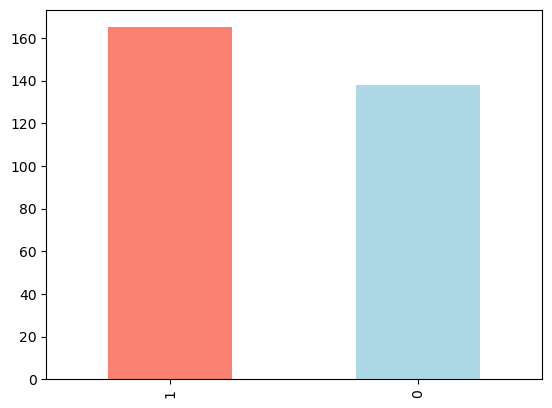

In [164]:
df['target'].value_counts().plot(kind ='bar', color = ['salmon', 'lightblue']);

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [166]:
#Are there missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [167]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heartr Disease Freqency according to Sex

In [168]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [169]:
#Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

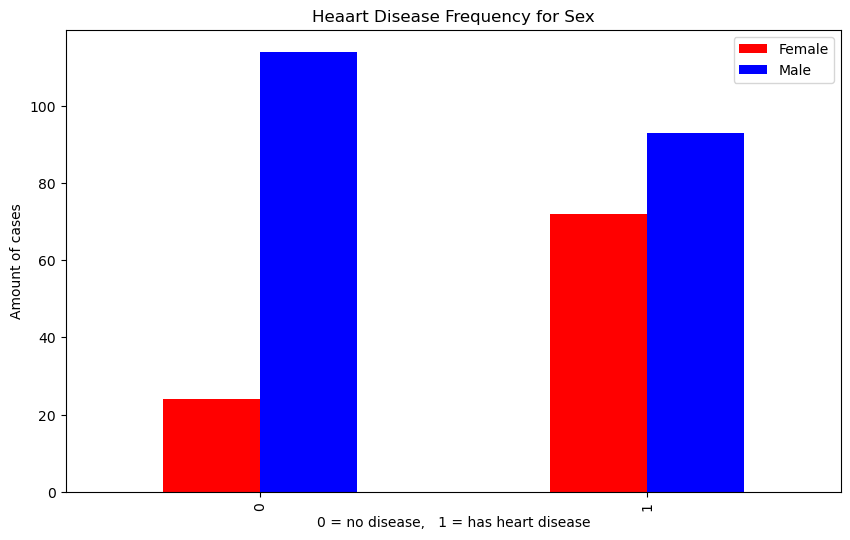

In [170]:
pd.crosstab(df.target, df.sex).plot(kind ='bar', figsize = (10,6), color = ['red', 'blue'])

plt.title('Heaart Disease Frequency for Sex')
plt.xlabel('0 = no disease,   1 = has heart disease')
plt.ylabel('Amount of cases')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 90)

In [171]:
# The current data we have shows that out of 96 women, 72 of them have heart disease and it might create biased result for the model. While for the men around only half the time a men has heart disease

In [172]:
## Task for tomorrow compare a few more columns on your own !! Add oil !!

In [173]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [174]:
## thalach is the maximum heart rate acheived, since there are more its better to use scatter diagram

## Age vs Heart Rate for Heart Disease

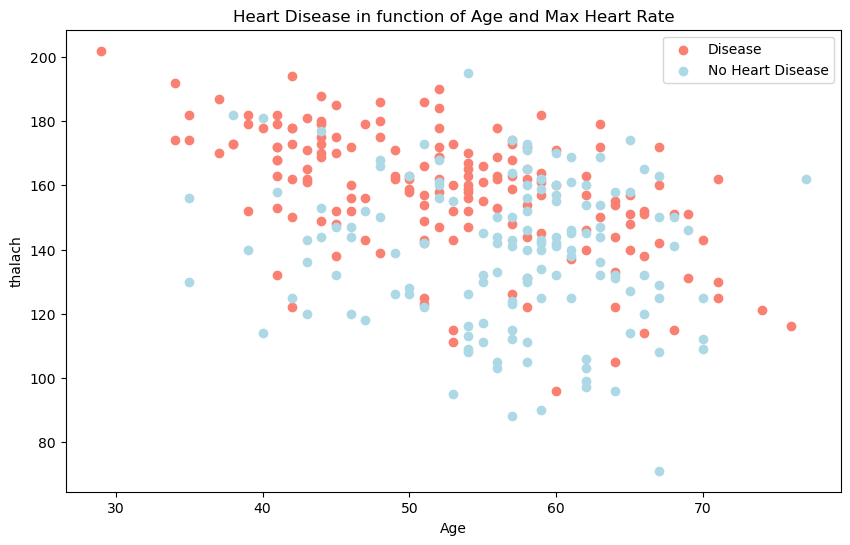

In [175]:
#Create another figure

plt.figure(figsize = (10,6))


#Scatter with positive examples
plt.scatter(df.age[df.target ==1],
           df.thalach[df.target ==1],
           c = 'salmon')

#Scatter with negative examples
plt.scatter(df.age[df.target ==0],
           df.thalach[df.target ==0],
           c = 'lightblue');

#Add some helpful title
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('thalach')
plt.legend(['Disease', 'No Heart Disease'])

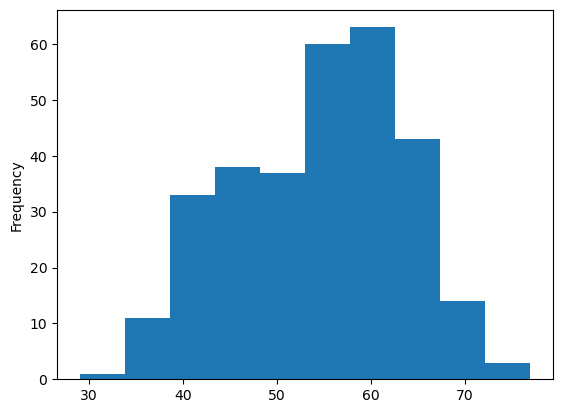

In [176]:
#Check the distributiuon of the age column with a histogam
df.age.plot.hist();

In [177]:
## Heart Disease Frequency per chess pain type

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


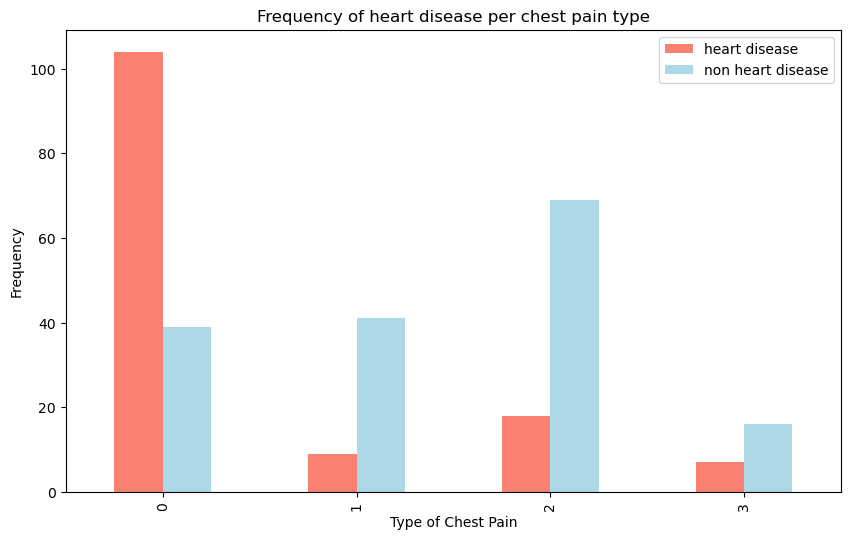

In [178]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (10,6), color =['salmon', 'lightblue']);

plt.title('Frequency of heart disease per chest pain type')
plt.xlabel('Type of Chest Pain')
plt.ylabel('Frequency')
plt.legend(['heart disease', 'non heart disease']);

In [179]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [180]:
#Make a Corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


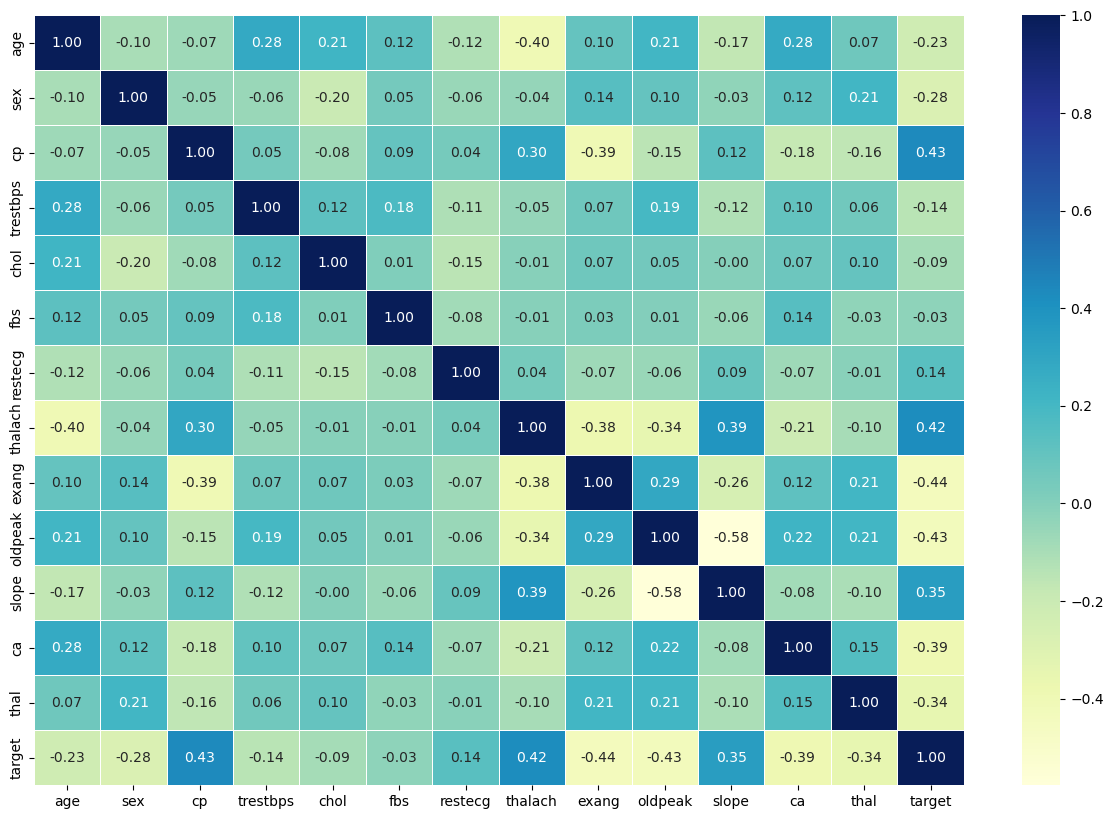

In [181]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize =(15,10))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths = 0.5,
                fmt= '.2f',
                cmap = 'YlGnBu')

In [182]:
#In a corelation matrix, a higher positive value means a higher possible corelation, as cp goes up the target also goes up
# A negative Corelation matrix means a negative relation, meaning the higher it is, the lower the target value

## 5. Modeling

In [183]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [184]:
# Split Data into x and y 
x = df.drop('target', axis =1)
y = df.target

In [185]:
# Split data into train and test sets
np.random.seed(42)

#Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.2)

#Now that we have split our data we can start to experiment different training method for the model
#we are going to try 3 differernt machine learning models

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classfier

In [186]:
# Put models in a dictionary

models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier()
}

#Create a function to fit and score models 
def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    Fit and evaluates given machine learning models.
    models: a dictionary of different SK learn models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    '''
    
    #Set Random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to the model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [187]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)

C:\Users\lawma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lawma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

In [188]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparision

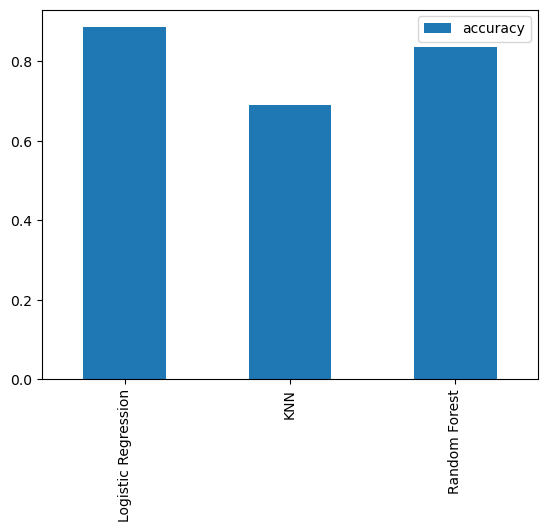

In [189]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar();

## Tuning the model

Lets look at the following
* Hyper parameter tuning
* Featurte importance
* Confusion matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classfication report
* ROC curve
* Area under the curve (AUC)

In [190]:
## for classification metrics, we used Accuracy, Precision, Recall and F1 as the evaluation criteria

## Hyperparameter tunning

In [191]:
#Tunning the KNN model

train_scores =[]
test_scores =[]


#Create a list of different values for n_neighbours
neighbors = range(1,21)

# Set up KNN instance 
knn = KNeighborsClassifier()

#Loop through different values in neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(x_train, y_train)
    
    #Update the training_Score
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

C:\Users\lawma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lawma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\lawma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lawma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [192]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

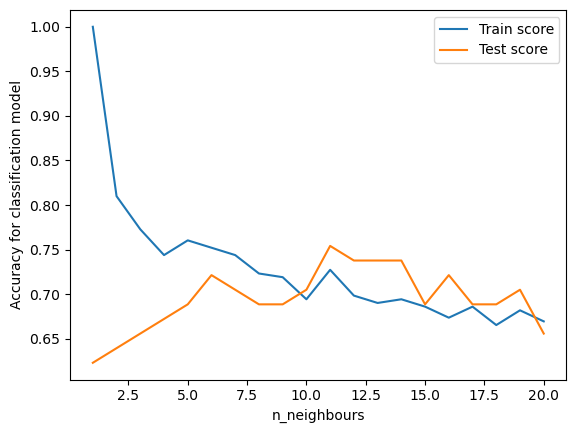

In [193]:
plt.plot(neighbors, train_scores, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test score')

plt.xlabel('n_neighbours')
plt.ylabel('Accuracy for classification model')
plt.legend(['Train score', 'Test score'])

## Hyper parametertunning by RandomisedsearchCV

In [194]:
#Create Hyper parameter grid for LogisticRegression
log_reg_grid = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}

#Create hyperparameter grid for RandomForestClasfier
rf_grid = {
    'n_estimators': np.arange(10,1000,50),
    'max_depth': [None, 3,5,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2)
}

In [195]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True
                               )

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [196]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [197]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

## Tuning the RandomForestClassfier

In [198]:
#Setup random seed
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

#Fit the Randomparameter model

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [200]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [201]:
rs_rf.score(x_test, y_test)

0.8688524590163934

## Grid Search CV for the logistic Regression !!

In [203]:
# Create a grid
log_reg_grid = {
    'C': np.logspace(-4,4,30),
    'solver': ['liblinear']
}


gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv = 5,
                         verbose = True)

#Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [204]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [206]:
#Evaluate the grid search LogisticRegression Model

gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classfier

*ROC curve
*confusion matrix
*classification report
*Precision
*Recall
*F1-score

would be great if cross-validation was used when possible.
To make comparison between different models, we first have to make prediction from them.

In [209]:
#Make prediction with tuned model

y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [210]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\Users\lawma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


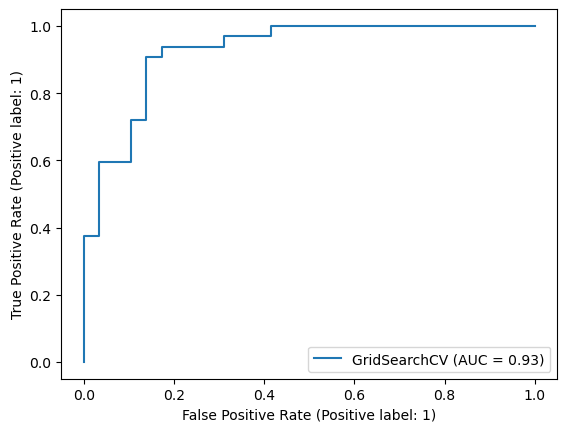

In [212]:
# Plot ROC curve and calculate AUC metric

plot_roc_curve(gs_log_reg, x_test, y_test)

In [213]:
#Confusion Metrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


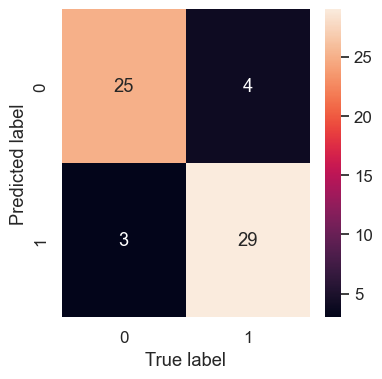

In [220]:
sns.set(font_scale = 1.1)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking confusion matrix using seaborn#s heatmap
    '''
    
    fig, ax = plt.subplots(figsize =(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = True)
    
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test, y_preds)

In [221]:
# Now we have got a ROC curve, an AUC metric and a confusion matrix,
#Lets get a classification report and cv precision, recall, f1_score

In [222]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrix using cross_validation

we are going to caluclate precision, recall, f1 while including cross_validation

In [223]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [225]:
#Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = 'liblinear')

In [231]:
#cross-validated accuracy

cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv = 5,
                        scoring = 'accuracy')

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [237]:
cv_acc = np.mean(cv_acc)

In [239]:
#cross-validated precision
cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv =5,
                        scoring = 'precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [240]:
#cross-validated recall
cv_recall = cross_val_score(clf,
                           x,
                           y,
                           cv =5,
                           scoring = 'recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [241]:
#cross-validated f1_score
cv_f1 = cross_val_score(clf,
                           x,
                           y,
                           cv =5,
                           scoring = 'f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<AxesSubplot:title={'center':'Cross-validated classifcation metrics'}>

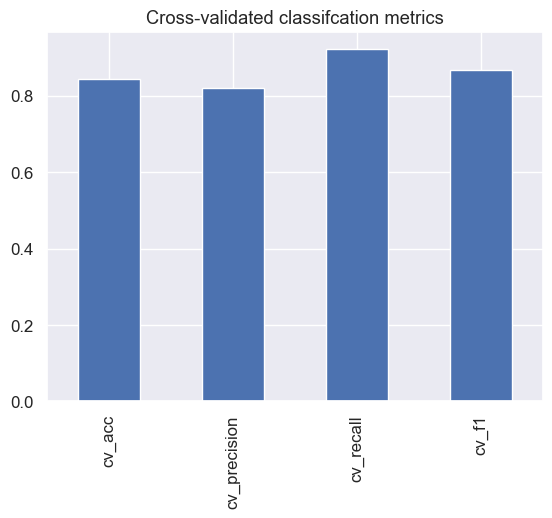

In [249]:
cv_dict = {
    'cv_acc':cv_acc,
    'cv_precision': cv_precision,
    'cv_recall': cv_recall,
    'cv_f1':cv_f1
}


cv_compare = pd.DataFrame(cv_dict, index = [0])
cv_compare.T.plot.bar(title = 'Cross-validated classifcation metrics',
                     legend = False)

## Feature Importance 

Feature importance is another way of asking 'which feature contributed most to the outcome of the model and how did they contribute? 

Finding feature importrance is different for each machine learning model

In [250]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [251]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [253]:
# Fit an instance of Logistic Regression
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = 'liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [254]:
# check coef
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [266]:
#Match coef'featuires to column

feature_dict = {}

for i,j in zip(df.keys(), list(clf.coef_[0])):
    feature_dict[str(i)] = j

feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [275]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index = [0])

feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


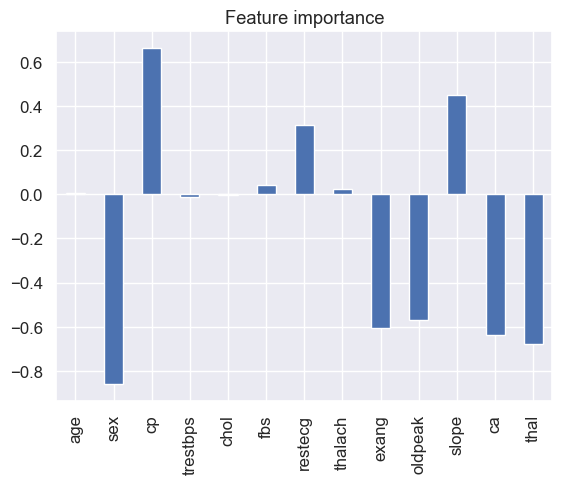

In [288]:
feature_df.T.plot(kind = 'bar', title = 'Feature importance', legend = False);

In [287]:
## negative value meaning negative corelation

## 6.Experimentation

if you havent hit your evaluation metric yet.. ask

* Could you collect more data
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models(beyond what we have done so far)

On the other hand..

* if your model does very well, how would your export it and share with others